In [39]:
import pyiast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#data importation
df_ch4 = pd.read_csv("isotherm_data_ch4.csv")
df_co2 = pd.read_csv("isotherm_data_co2.csv")

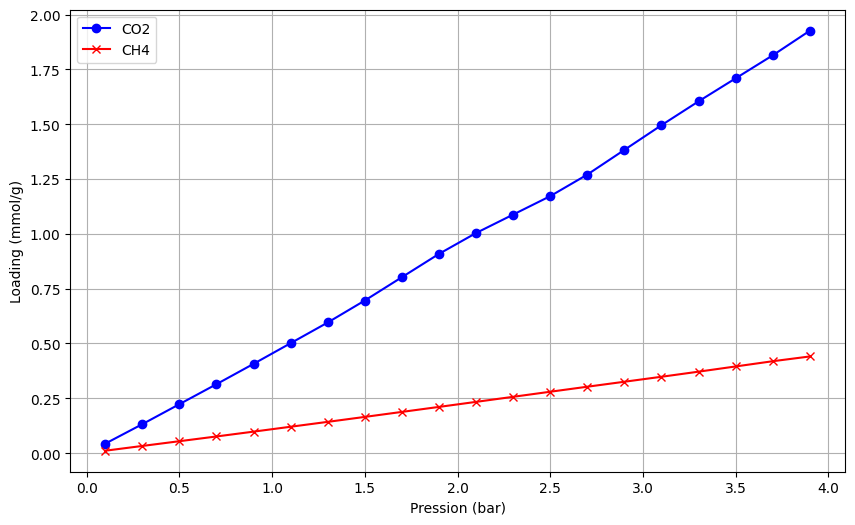

In [55]:
#pressure values
p = np.arange(0.1, 4.1, 0.2) 

#obtain q values for ch4
ch4_isotherm = pyiast.InterpolatorIsotherm(df_ch4,
                                    loading_key="Loading (mmol/g)",
                                    pressure_key="Pressure (bar)")
ch4_isotherm = pyiast.InterpolatorIsotherm(df_ch4,
                                    loading_key="Loading (mmol/g)",
                                    pressure_key="Pressure (bar)",
                                    fill_value=df_ch4['Loading (mmol/g)'].max())
q_ch4 = [ch4_isotherm.loading(i) for i in p]

#obtain q values for co2
co2_isotherm = pyiast.InterpolatorIsotherm(df_co2,
                                    loading_key="loading (mmol/g)",
                                    pressure_key="pressure (bar)")
co2_isotherm = pyiast.InterpolatorIsotherm(df_co2,
                                    loading_key="loading (mmol/g)",
                                    pressure_key="pressure (bar)",
                                    fill_value=df_co2['loading (mmol/g)'].max()) 
q_co2 =  [co2_isotherm.loading(i) for i in p]

#plot the isotherm
plt.figure(figsize=(10, 6))
plt.plot(p, q_co2, marker='o', linestyle='-', color='b', label='CO2')
plt.plot(p, q_ch4, marker='x', linestyle='-', color='r', label='CH4')
plt.xlabel('Pression (bar)')
plt.ylabel('Loading (mmol/g)')
plt.grid(True)
plt.legend()



In [43]:
#data obtained
loading_absolute_average = [0.021916150047, 0.086852890927, 0.15377020240384, 0.22218105892092, 0.29150102981032, 0.359587202623, 0.431017617591, 0.4899477099396, 0.55270907000012, 0.62823049964356, 0.68696578176952, 0.75144796546336, 0.82284591206092, 0.89326980754528, 0.9633365509548, 1.024669302716, 1.0889891445576, 1.1474971480905]
pressure = [0.2, 0.8, 1.4, 2.0, 2.6, 3.2, 3.8, 4.4, 5.0, 5.6, 6.2, 6.8, 7.4, 8.0, 8.6, 9.2, 9.8, 10.2]

#conversion into a csv file
df = pd.DataFrame({
    'Pressure (bar)': pressure,
    'Loading (mmol/g)': loading_absolute_average
})

# Sauvegarder les données dans un fichier CSV
#df.to_csv('isotherm_data.csv', index=False)